In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('file:///F:/covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [3]:
df=df.drop(['date','iso_code','continent'],axis='columns')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
li=LabelEncoder()

In [6]:
df.shape

(112660, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112660 entries, 0 to 112659
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   location                         112660 non-null  object 
 1   total_cases                      107645 non-null  float64
 2   new_cases                        107642 non-null  float64
 3   new_cases_smoothed               106627 non-null  float64
 4   total_deaths                     97105 non-null   float64
 5   new_deaths                       97260 non-null   float64
 6   new_deaths_smoothed              106627 non-null  float64
 7   total_cases_per_million          107076 non-null  float64
 8   new_cases_per_million            107073 non-null  float64
 9   new_cases_smoothed_per_million   106063 non-null  float64
 10  total_deaths_per_million         96549 non-null   float64
 11  new_deaths_per_million           96704 non-null   float64
 12  ne

In [8]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.076450e+05,107642.000000,106627.000000,9.710500e+04,97260.000000,106627.000000,107076.000000,107073.000000,106063.000000,96549.000000,96704.000000,106063.000000,90551.000000,100466.000000,100350.000000,103192.000000,50407.000000,91273.000000,106880.000000,100444.000000
mean,1.287368e+06,6346.362321,6347.264937,3.345767e+04,146.106837,132.385450,15839.642852,79.650358,79.557931,339.160355,1.529690,1.385333,1.010980,19273.265610,258.982878,7.972123,50.772220,3.024645,73.253047,0.726803
std,8.680111e+06,38992.853741,38500.828643,1.996246e+05,797.310436,743.655792,27798.009585,204.025337,159.912326,590.337479,3.904974,2.971170,0.350164,20038.763568,119.225251,4.206951,31.754908,2.454889,7.550812,0.150273
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,-75.911000,-10.844000,-0.010000,661.240000,79.370000,0.990000,1.188000,0.100000,53.280000,0.394000
25%,1.689000e+03,2.000000,8.429000,6.200000e+01,0.000000,0.000000,305.593000,0.249000,1.447000,9.231000,0.000000,0.000000,0.840000,4466.507000,168.711000,5.310000,19.351000,1.300000,67.920000,0.602000
50%,1.735400e+04,84.000000,104.714000,5.230000e+02,2.000000,1.571000,2335.394000,9.717000,13.127000,60.866000,0.141000,0.173000,1.020000,12951.839000,242.648000,7.110000,49.839000,2.400000,74.620000,0.744000
75%,1.852780e+05,881.000000,930.500000,4.636000e+03,18.000000,15.143000,17799.241250,75.911000,84.467000,395.663000,1.323000,1.287000,1.180000,27216.445000,329.942000,10.080000,82.502000,3.861000,78.740000,0.848000
max,2.159867e+08,905992.000000,826362.429000,4.494510e+06,17977.000000,14722.429000,199949.449000,18188.252000,4059.968000,5937.274000,215.334000,63.007000,5.910000,116935.600000,724.417000,30.530000,100.000000,13.800000,86.750000,0.957000


In [9]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,20.0,0.291831,0.402981,-0.036080,0.020244,0.045430,0.811113,1.0
new_cases,20.0,0.304861,0.416660,-0.038444,0.021016,0.076586,0.841938,1.0
new_cases_smoothed,20.0,0.306219,0.419560,-0.038833,0.021215,0.069541,0.853772,1.0
total_deaths,20.0,0.296909,0.406012,-0.042905,0.024315,0.049965,0.834199,1.0
new_deaths,20.0,0.303883,0.412143,-0.040171,0.025681,0.062724,0.811989,1.0
new_deaths_smoothed,20.0,0.306702,0.415595,-0.043747,0.021440,0.066817,0.833472,1.0
total_cases_per_million,20.0,0.265504,0.282176,-0.176695,0.063281,0.239577,0.386301,1.0
new_cases_per_million,20.0,0.242167,0.275694,-0.108326,0.057403,0.147060,0.310054,1.0
new_cases_smoothed_per_million,20.0,0.274880,0.289193,-0.137174,0.072397,0.187261,0.398449,1.0
total_deaths_per_million,20.0,0.253000,0.274415,-0.174478,0.093089,0.171412,0.347143,1.0


In [10]:
df.min()

location                           Afghanistan
total_cases                                1.0
new_cases                             -74347.0
new_cases_smoothed                     -6223.0
total_deaths                               1.0
new_deaths                             -1918.0
new_deaths_smoothed                   -232.143
total_cases_per_million                  0.001
new_cases_per_million                -3125.829
new_cases_smoothed_per_million        -272.971
total_deaths_per_million                 0.001
new_deaths_per_million                 -75.911
new_deaths_smoothed_per_million        -10.844
reproduction_rate                        -0.01
gdp_per_capita                          661.24
cardiovasc_death_rate                    79.37
diabetes_prevalence                       0.99
handwashing_facilities                   1.188
hospital_beds_per_thousand                 0.1
life_expectancy                          53.28
human_development_index                  0.394
dtype: object

In [11]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_cases                        1.287368e+06
new_cases                          6.346362e+03
new_cases_smoothed                 6.347265e+03
total_deaths                       3.345767e+04
new_deaths                         1.461068e+02
new_deaths_smoothed                1.323854e+02
total_cases_per_million            1.583964e+04
new_cases_per_million              7.965036e+01
new_cases_smoothed_per_million     7.955793e+01
total_deaths_per_million           3.391604e+02
new_deaths_per_million             1.529690e+00
new_deaths_smoothed_per_million    1.385333e+00
reproduction_rate                  1.010980e+00
gdp_per_capita                     1.927327e+04
cardiovasc_death_rate              2.589829e+02
diabetes_prevalence                7.972123e+00
handwashing_facilities             5.077222e+01
hospital_beds_per_thousand         3.024645e+00
life_expectancy                    7.325305e+01
human_development_index            7.268031e-01
dtype: float64

In [12]:
df.max()

location                              Zimbabwe
total_cases                        215986748.0
new_cases                             905992.0
new_cases_smoothed                  826362.429
total_deaths                         4494510.0
new_deaths                             17977.0
new_deaths_smoothed                  14722.429
total_cases_per_million             199949.449
new_cases_per_million                18188.252
new_cases_smoothed_per_million        4059.968
total_deaths_per_million              5937.274
new_deaths_per_million                 215.334
new_deaths_smoothed_per_million         63.007
reproduction_rate                         5.91
gdp_per_capita                        116935.6
cardiovasc_death_rate                  724.417
diabetes_prevalence                      30.53
handwashing_facilities                   100.0
hospital_beds_per_thousand                13.8
life_expectancy                          86.75
human_development_index                  0.957
dtype: object

In [13]:
df.quantile()

total_cases                        17354.000
new_cases                             84.000
new_cases_smoothed                   104.714
total_deaths                         523.000
new_deaths                             2.000
new_deaths_smoothed                    1.571
total_cases_per_million             2335.394
new_cases_per_million                  9.717
new_cases_smoothed_per_million        13.127
total_deaths_per_million              60.866
new_deaths_per_million                 0.141
new_deaths_smoothed_per_million        0.173
reproduction_rate                      1.020
gdp_per_capita                     12951.839
cardiovasc_death_rate                242.648
diabetes_prevalence                    7.110
handwashing_facilities                49.839
hospital_beds_per_thousand             2.400
life_expectancy                       74.620
human_development_index                0.744
Name: 0.5, dtype: float64

In [14]:
df.head()

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.025,0.025,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [15]:
df=df.rename({'State/UTs':'State'},axis='columns')

In [16]:
df

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.025,0.025,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112655,Zimbabwe,123320.0,319.0,324.857,4320.0,27.0,23.429,8171.124,21.137,21.525,...,1.789,1.552,0.66,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
112656,Zimbabwe,123711.0,391.0,316.143,4338.0,18.0,22.429,8197.031,25.907,20.947,...,1.193,1.486,NaN,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
112657,Zimbabwe,123986.0,275.0,297.714,4356.0,18.0,22.571,8215.253,18.221,19.726,...,1.193,1.496,NaN,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
112658,Zimbabwe,124236.0,250.0,333.429,4374.0,18.0,25.143,8231.818,16.565,22.093,...,1.193,1.666,NaN,1899.775,307.846,1.82,36.791,1.7,61.49,0.571


In [17]:
df.columns

Index(['location', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [18]:
df=df.fillna(0)

In [19]:
x=df.drop(['location'],axis='columns')

In [20]:
y=df.location.values

In [21]:
x.shape

(112660, 20)

In [22]:
y.shape

(112660,)

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [24]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

99.43487780342032

In [25]:
print(classification_report(ytest,pred_tre))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       175
                          Africa       0.97      0.98      0.97       181
                         Albania       1.00      1.00      1.00       150
                         Algeria       1.00      1.00      1.00       152
                         Andorra       1.00      1.00      1.00       163
                          Angola       1.00      1.00      1.00       181
                        Anguilla       1.00      1.00      1.00        64
             Antigua and Barbuda       1.00      1.00      1.00       150
                       Argentina       1.00      1.00      1.00       192
                         Armenia       1.00      1.00      1.00       169
                           Aruba       1.00      1.00      1.00        49
                            Asia       0.98      0.98      0.98       187
                       Australia     

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

87.1708385111545

In [28]:
print(classification_report(ytest,pred_kne))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       0.93      0.86      0.89       175
                          Africa       0.44      0.64      0.52       181
                         Albania       0.85      0.95      0.90       150
                         Algeria       0.82      1.00      0.90       152
                         Andorra       0.96      0.93      0.94       163
                          Angola       0.81      1.00      0.89       181
                        Anguilla       1.00      1.00      1.00        64
             Antigua and Barbuda       1.00      1.00      1.00       150
                       Argentina       0.45      0.66      0.53       192
                         Armenia       0.92      0.79      0.85       169
                           Aruba       1.00      1.00      1.00        49
                            Asia       0.49      0.49      0.49       187
                       Australia     

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

3.9144328066749514

In [31]:
print(classification_report(ytest,pred_ada))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       175
                          Africa       0.00      0.00      0.00       181
                         Albania       0.00      0.00      0.00       150
                         Algeria       0.00      0.00      0.00       152
                         Andorra       0.00      0.00      0.00       163
                          Angola       0.00      0.00      0.00       181
                        Anguilla       0.00      0.00      0.00        64
             Antigua and Barbuda       0.00      0.00      0.00       150
                       Argentina       0.00      0.00      0.00       192
                         Armenia       0.00      0.00      0.00       169
                           Aruba       0.00      0.00      0.00        49
                            Asia       0.00      0.00      0.00       187
                       Australia     

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

64.50973430380496

In [34]:
print(classification_report(ytest,pre_gau))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       0.96      0.62      0.76       175
                          Africa       0.50      0.83      0.62       181
                         Albania       0.63      0.48      0.54       150
                         Algeria       0.62      0.73      0.67       152
                         Andorra       0.93      0.60      0.73       163
                          Angola       0.88      0.62      0.73       181
                        Anguilla       0.00      0.00      0.00        64
             Antigua and Barbuda       1.00      1.00      1.00       150
                       Argentina       0.90      0.41      0.56       192
                         Armenia       0.60      0.54      0.57       169
                           Aruba       0.58      1.00      0.74        49
                            Asia       0.59      0.71      0.64       187
                       Australia     

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

99.49405290253861

In [37]:
print(classification_report(ytest,pre_etc))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       175
                          Africa       0.99      1.00      0.99       181
                         Albania       1.00      1.00      1.00       150
                         Algeria       1.00      1.00      1.00       152
                         Andorra       1.00      1.00      1.00       163
                          Angola       1.00      1.00      1.00       181
                        Anguilla       1.00      1.00      1.00        64
             Antigua and Barbuda       1.00      1.00      1.00       150
                       Argentina       1.00      1.00      1.00       192
                         Armenia       1.00      1.00      1.00       169
                           Aruba       1.00      1.00      1.00        49
                            Asia       1.00      0.99      1.00       187
                       Australia     

In [100]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier'],
    'Score': [accu_tre, accu_kne, accu_ada,accu_l,accu_ada,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,ExtraTreesClassifier,99.494053
0,DecisionTreeClassifier,99.434878
1,KNeighborsClassifier,87.170839
3,GaussianNB,64.509734
2,AdaBoostClassifier,3.914433
4,AdaBoostClassifier,3.914433


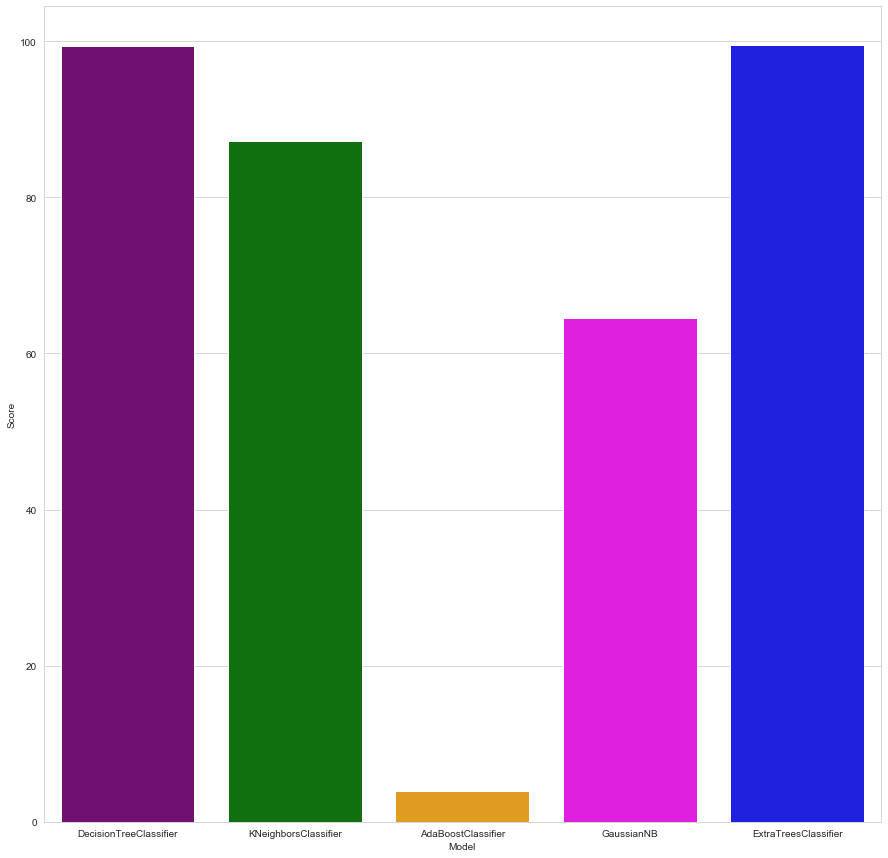

In [101]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
df

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,1.0,1.0,0.000,0.0,0.0,0.000,0.025,0.025,0.000,...,0.000,0.000,0.00,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,Afghanistan,1.0,0.0,0.000,0.0,0.0,0.000,0.025,0.000,0.000,...,0.000,0.000,0.00,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,Afghanistan,1.0,0.0,0.000,0.0,0.0,0.000,0.025,0.000,0.000,...,0.000,0.000,0.00,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,Afghanistan,1.0,0.0,0.000,0.0,0.0,0.000,0.025,0.000,0.000,...,0.000,0.000,0.00,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,Afghanistan,1.0,0.0,0.000,0.0,0.0,0.000,0.025,0.000,0.000,...,0.000,0.000,0.00,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112655,Zimbabwe,123320.0,319.0,324.857,4320.0,27.0,23.429,8171.124,21.137,21.525,...,1.789,1.552,0.66,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
112656,Zimbabwe,123711.0,391.0,316.143,4338.0,18.0,22.429,8197.031,25.907,20.947,...,1.193,1.486,0.00,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
112657,Zimbabwe,123986.0,275.0,297.714,4356.0,18.0,22.571,8215.253,18.221,19.726,...,1.193,1.496,0.00,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
112658,Zimbabwe,124236.0,250.0,333.429,4374.0,18.0,25.143,8231.818,16.565,22.093,...,1.193,1.666,0.00,1899.775,307.846,1.82,36.791,1.7,61.49,0.571


In [40]:
import sklearn.cluster as cluster

In [41]:
df.columns

Index(['location', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [42]:
kmns=cluster.KMeans(n_clusters=5)

In [43]:
kmns=kmns.fit(df[['total_cases','total_cases_per_million']])

In [44]:
kmns.cluster_centers_

array([[2.78763048e+05, 1.43792449e+04],
       [1.81298045e+08, 2.30220742e+04],
       [3.84789881e+07, 5.53468637e+04],
       [1.09333964e+08, 1.38837384e+04],
       [1.59765640e+07, 3.11566913e+04]])

In [45]:
df['total_cases and total_cases_per_million']=kmns.labels_

In [46]:
from sklearn.cluster import KMeans 

In [47]:
k_range=range(1,15)
wss=[]

In [49]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['total_cases','total_cases_per_million']])
    wss.append(km.inertia_)

In [50]:
wss

[8.118389827662651e+18,
 2.791351353657928e+18,
 7.906486380746602e+17,
 5.1322574131299437e+17,
 3.25402051833615e+17,
 2.2123224402293238e+17,
 1.613021181082436e+17,
 1.2766712217878928e+17,
 1.050962648081917e+17,
 8.402715498186222e+16,
 6.949263532425814e+16,
 5.948078148781078e+16,
 5.052454042912858e+16,
 4.323467568478156e+16]

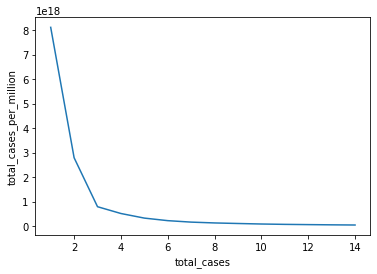

In [51]:
plt.xlabel('total_cases')
plt.ylabel('total_cases_per_million')
plt.plot(k_range,wss)

In [52]:
kmns=cluster.KMeans(n_clusters=5)

In [53]:
kmns=kmns.fit(df[['new_cases','new_cases_per_million']])

In [54]:
kmns.cluster_centers_

array([[1.37257228e+03, 7.21471615e+01],
       [4.46558873e+05, 9.12555127e+01],
       [2.12460188e+05, 2.65423909e+02],
       [7.34447889e+04, 1.77221790e+02],
       [6.99449353e+05, 8.88193676e+01]])

In [55]:
df['new_cases and new_cases_per_million']=kmns.labels_

In [56]:
k_range=range(1,15)
wss=[]

In [57]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['new_cases','new_cases_per_million']])
    wss.append(km.inertia_)

In [58]:
wss

[163859561724582.94,
 49189115934638.97,
 20891394405207.715,
 11770654394707.758,
 7724804743333.157,
 5369106791572.852,
 3967294055464.189,
 3103008454430.3193,
 2482960268295.95,
 1999625476988.86,
 1600531771214.5798,
 1347308784400.5159,
 1154599309398.1836,
 993207516684.8635]

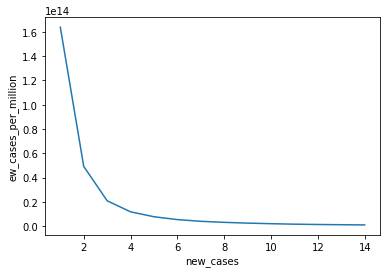

In [59]:
plt.xlabel('new_cases')
plt.ylabel('ew_cases_per_million')
plt.plot(k_range,wss)

In [60]:
kmns=cluster.KMeans(n_clusters=5)

In [61]:
kmns=kmns.fit(df[['new_cases_smoothed','new_cases_smoothed_per_million']])

In [62]:
kmns.cluster_centers_

array([[1.38792900e+03, 7.18628991e+01],
       [4.10801225e+05, 8.55660400e+01],
       [7.47999854e+04, 1.60147283e+02],
       [6.40461065e+05, 8.13287240e+01],
       [2.07493597e+05, 2.57416885e+02]])

In [63]:
df['Age by Experience']=kmns.labels_

In [64]:
k_range=range(1,15)
wss=[]

In [65]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['new_cases_smoothed','new_cases_smoothed_per_million']])
    wss.append(km.inertia_)

In [66]:
wss

[158285983771375.8,
 47560214179309.97,
 18769088776610.516,
 10495782453960.117,
 6994833013911.201,
 4697305204751.346,
 3561528880418.576,
 2634604520589.728,
 2117479019101.476,
 1694830607474.9946,
 1306397868078.3882,
 1093368029579.4836,
 949267134676.1647,
 817068016309.4689]

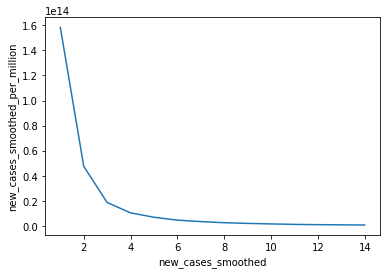

In [67]:
plt.xlabel('new_cases_smoothed')
plt.ylabel('new_cases_smoothed_per_million')
plt.plot(k_range,wss)

In [68]:
kmns=cluster.KMeans(n_clusters=5)

In [69]:
kmns=kmns.fit(df[['total_deaths','total_deaths_per_million']])

In [70]:
kmns.cluster_centers_

array([[6.99864017e+03, 2.66047692e+02],
       [3.87643239e+06, 4.92247500e+02],
       [9.05510674e+05, 1.21529058e+03],
       [3.61636905e+05, 1.10516462e+03],
       [2.43320671e+06, 3.08979984e+02]])

In [71]:
df['total_deaths and total_deaths_per_million']=kmns.labels_

In [72]:
k_range=range(1,15)
wss=[]

In [73]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['total_deaths','total_deaths_per_million']])
    wss.append(km.inertia_)

In [74]:
wss

[3884636332413158.0,
 1341097061615444.0,
 404966302803852.0,
 268571586594859.44,
 170510305102873.53,
 107924416862002.16,
 81296247859687.05,
 61870873386315.56,
 50728027265811.72,
 40865516430821.09,
 32665742727102.17,
 28225217671497.156,
 23868343010020.457,
 20469539435256.992]

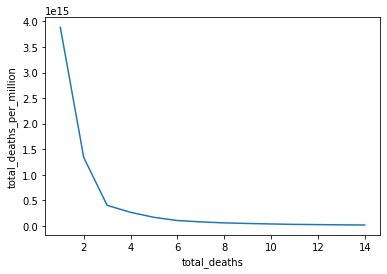

In [75]:
plt.xlabel('total_deaths')
plt.ylabel('total_deaths_per_million')
plt.plot(k_range,wss)

In [76]:
kmns=cluster.KMeans(n_clusters=5)

In [77]:
kmns=kmns.fit(df[['new_deaths','new_deaths_per_million']])

In [78]:
kmns.cluster_centers_

array([[2.42285186e+01, 1.15752947e+00],
       [6.52047342e+03, 2.79446835e+00],
       [3.35332742e+03, 6.16701356e+00],
       [1.23718737e+04, 1.57102105e+00],
       [1.15866767e+03, 5.18664617e+00]])

In [79]:
df['new_deaths and new_deaths_per_million']=kmns.labels_

In [80]:
k_range=range(1,15)
wss=[]

In [81]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['new_deaths','new_deaths_per_million']])
    wss.append(km.inertia_)

In [82]:
wss

[62113244455.53916,
 19303451092.805645,
 8687376418.037397,
 4689900730.691929,
 3186957951.193829,
 2240372578.6779847,
 1570631482.1864886,
 1205437727.972199,
 971237337.0098492,
 796493484.7103486,
 662299501.929247,
 563059665.8575892,
 469582191.2357156,
 396740576.41703725]

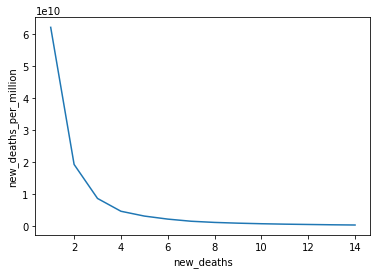

In [83]:
plt.xlabel('new_deaths')
plt.ylabel('new_deaths_per_million')
plt.plot(k_range,wss)

In [84]:
kmns=cluster.KMeans(n_clusters=5)

In [85]:
kmns=kmns.fit(df[['new_deaths_smoothed','new_deaths_smoothed_per_million']])

In [86]:
kmns.cluster_centers_

array([[2.08561629e+01, 1.12902384e+00],
       [5.23451100e+03, 3.14142115e+00],
       [9.00973642e+02, 5.01505913e+00],
       [1.10433200e+04, 1.40233579e+00],
       [2.68429053e+03, 5.63414907e+00]])

In [87]:
df['new_deaths_smoothed and new_deaths_smoothed_per_million']=kmns.labels_

In [88]:
k_range=range(1,15)
wss=[]

In [89]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['new_deaths_smoothed','new_deaths_smoothed_per_million']])
    wss.append(km.inertia_)

In [90]:
wss

[59067750271.20291,
 18277284307.14662,
 7147378560.825784,
 3709352330.4542956,
 2543176544.529467,
 1810228224.2160194,
 1236337903.2272828,
 941445572.5858827,
 775830261.9519393,
 627088063.7422979,
 505809873.86402917,
 420924797.6780779,
 363740474.4644952,
 316444954.84887064]

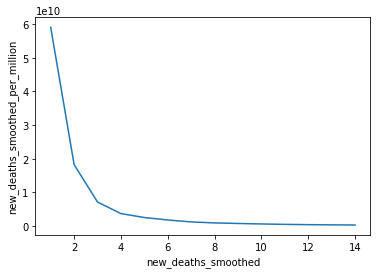

In [91]:
plt.xlabel('new_deaths_smoothed')
plt.ylabel('new_deaths_smoothed_per_million')
plt.plot(k_range,wss)

In [92]:
kmns=cluster.KMeans(n_clusters=5)

In [93]:
kmns=kmns.fit(df[['new_cases','reproduction_rate']])

In [94]:
kmns.cluster_centers_

array([[1.37257228e+03, 8.23647922e-01],
       [4.46558873e+05, 8.37330508e-01],
       [7.34447889e+04, 4.38723135e-01],
       [2.12460188e+05, 3.38847185e-01],
       [6.99449353e+05, 1.00691176e+00]])

In [95]:
df['new_cases and reproduction_rate']=kmns.labels_

In [96]:
k_range=range(1,15)
wss=[]

In [97]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['new_cases','reproduction_rate']])
    wss.append(km.inertia_)

In [98]:
wss

[163855071051426.34,
 49184634417149.55,
 20886923904181.914,
 11766286877950.957,
 7720366757591.9375,
 5364301524514.748,
 3962843441531.8423,
 3098681163842.8955,
 2471117557725.627,
 1995923514444.9,
 1596882515478.8484,
 1342775942308.6694,
 1150522275902.4543,
 989272511815.9751]

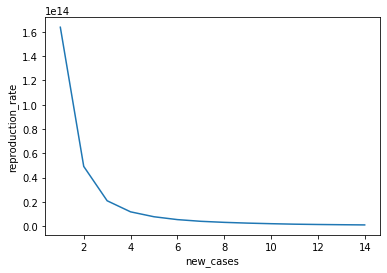

In [99]:
plt.xlabel('new_cases')
plt.ylabel('reproduction_rate')
plt.plot(k_range,wss)

In [103]:
kmns=cluster.KMeans(n_clusters=5)

In [104]:
kmns=kmns.fit(df[['reproduction_rate','cardiovasc_death_rate']])

In [105]:
kmns.cluster_centers_

array([[ 8.47550257e-01,  3.81562221e+02],
       [ 9.73709218e-01,  1.37694473e+02],
       [ 8.65028400e-01,  2.48524839e+02],
       [ 1.45739236e-01, -2.74269496e-11],
       [ 8.26217206e-01,  5.61126672e+02]])

In [109]:
df['reproduction_rate and cardiovasc_death_rate']=kmns.labels_

In [114]:
k_range=range(1,15)
wos=[]

In [116]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['reproduction_rate','cardiovasc_death_rate']])
    wos.append(km.inertia_)

In [117]:
wos

[2161897150.481448,
 841016343.9614724,
 394141213.86510515,
 231858906.48978633,
 139531810.24262133,
 88801763.55451053,
 58095880.651388615,
 43716855.23642903,
 31872609.764053162,
 25866425.630890507,
 19787510.679206774,
 16061689.36681131,
 13077673.700855393,
 10781139.168242278]

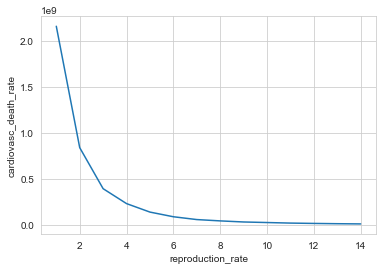

In [118]:
plt.xlabel('reproduction_rate')
plt.ylabel('cardiovasc_death_rate')
plt.plot(k_range,wos)

In [120]:
kmns=cluster.KMeans(n_clusters=5)

In [122]:
kmns=kmns.fit(df[['reproduction_rate','diabetes_prevalence']])

In [123]:
kmns.cluster_centers_

array([[ 0.52393487,  1.17147428],
       [ 0.94545086,  7.58697896],
       [ 0.72473804, 18.40895082],
       [ 0.76367178, 11.31442138],
       [ 0.91601285,  5.04211929]])

In [126]:
df['reproduction_rate and diabetes_prevalence']=kmns.labels_

In [127]:
k_range=range(1,15)
wss=[]

In [128]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['reproduction_rate','diabetes_prevalence']])
    wss.append(km.inertia_)

In [129]:
wss

[2406750.9301239196,
 995260.0489555594,
 557398.470588349,
 304531.7283558157,
 219541.12202774774,
 149082.14573585754,
 114352.59032155751,
 86047.41090877526,
 70831.51290034389,
 57491.50037277248,
 46941.156661697314,
 41188.78906702386,
 38387.31978962541,
 35826.769892621]

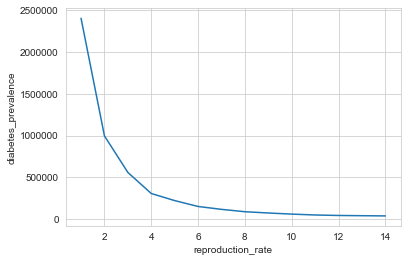

In [130]:
plt.xlabel('reproduction_rate')
plt.ylabel('diabetes_prevalence')
plt.plot(k_range,wss)

In [131]:
df.head()

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,human_development_index,total_cases and total_cases_per_million,new_cases and new_cases_per_million,Age by Experience,total_deaths and total_deaths_per_million,new_deaths and new_deaths_per_million,new_deaths_smoothed and new_deaths_smoothed_per_million,new_cases and reproduction_rate,reproduction_rate and cardiovasc_death_rate,reproduction_rate and diabetes_prevalence
0,Afghanistan,1.0,1.0,0.0,0.0,0.0,0.0,0.025,0.025,0.0,...,0.511,0,0,3,0,0,0,0,4,3
1,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,0.025,0.000,0.0,...,0.511,0,0,3,0,0,0,0,4,3
2,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,0.025,0.000,0.0,...,0.511,0,0,3,0,0,0,0,4,3
3,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,0.025,0.000,0.0,...,0.511,0,0,3,0,0,0,0,4,3
4,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,0.025,0.000,0.0,...,0.511,0,0,3,0,0,0,0,4,3


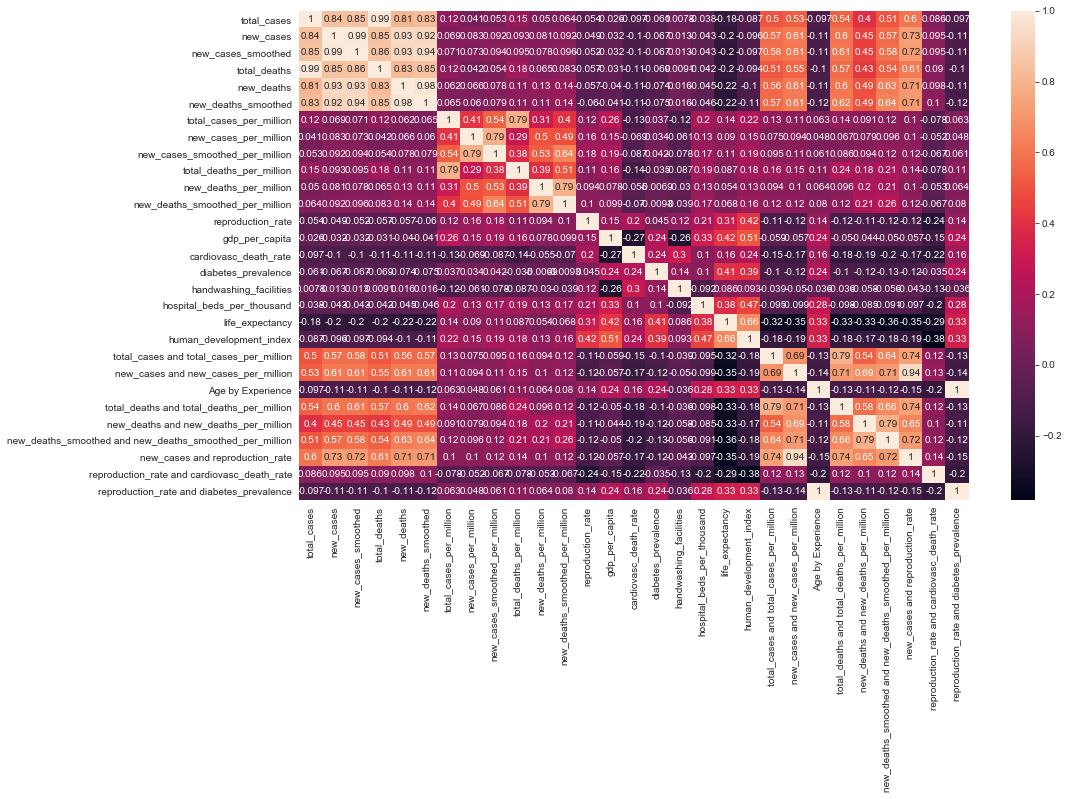

In [134]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [136]:
import sweetviz as sv
from IPython.display import IFrame

In [137]:
data=sv.analyze(df)
data.show_html('Analyze.html')
IFrame(src='Analyze.html',width=1000,height=600)

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [138]:
df.columns

Index(['location', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'total_cases and total_cases_per_million',
       'new_cases and new_cases_per_million', 'Age by Experience',
       'total_deaths and total_deaths_per_million',
       'new_deaths and new_deaths_per_million',
       'new_deaths_smoothed and new_deaths_smoothed_per_million',
       'new_cases and reproduction_rate',
       'reproduction_rate and cardiovasc_death_rate',
       'reproduction_rate and diabetes_prevalence'],
      dtype='object')

In [139]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [140]:
man=MinMaxScaler()
feat=['total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'total_cases and total_cases_per_million',
       'new_cases and new_cases_per_million', 'Age by Experience',
       'total_deaths and total_deaths_per_million',
       'new_deaths and new_deaths_per_million',
       'new_deaths_smoothed and new_deaths_smoothed_per_million',
       'new_cases and reproduction_rate',
       'reproduction_rate and cardiovasc_death_rate',
       'reproduction_rate and diabetes_prevalence']
df[feat]=man.fit_transform(df[feat])
df[feat]

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,human_development_index,total_cases and total_cases_per_million,new_cases and new_cases_per_million,Age by Experience,total_deaths and total_deaths_per_million,new_deaths and new_deaths_per_million,new_deaths_smoothed and new_deaths_smoothed_per_million,new_cases and reproduction_rate,reproduction_rate and cardiovasc_death_rate,reproduction_rate and diabetes_prevalence
0,4.629914e-09,0.075839,0.007474,0.000000,0.096406,0.015523,1.250316e-07,0.146657,0.062999,0.000000,...,0.533960,0.0,0.0,0.75,0.0,0.0,0.0,0.0,1.0,0.75
1,4.629914e-09,0.075838,0.007474,0.000000,0.096406,0.015523,1.250316e-07,0.146656,0.062999,0.000000,...,0.533960,0.0,0.0,0.75,0.0,0.0,0.0,0.0,1.0,0.75
2,4.629914e-09,0.075838,0.007474,0.000000,0.096406,0.015523,1.250316e-07,0.146656,0.062999,0.000000,...,0.533960,0.0,0.0,0.75,0.0,0.0,0.0,0.0,1.0,0.75
3,4.629914e-09,0.075838,0.007474,0.000000,0.096406,0.015523,1.250316e-07,0.146656,0.062999,0.000000,...,0.533960,0.0,0.0,0.75,0.0,0.0,0.0,0.0,1.0,0.75
4,4.629914e-09,0.075838,0.007474,0.000000,0.096406,0.015523,1.250316e-07,0.146656,0.062999,0.000000,...,0.533960,0.0,0.0,0.75,0.0,0.0,0.0,0.0,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112655,5.709610e-04,0.076163,0.007864,0.000961,0.097763,0.017090,4.086595e-02,0.147647,0.067967,0.048211,...,0.596656,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.00
112656,5.727713e-04,0.076237,0.007854,0.000965,0.097311,0.017023,4.099552e-02,0.147871,0.067833,0.048412,...,0.596656,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.00
112657,5.740445e-04,0.076119,0.007832,0.000969,0.097311,0.017033,4.108665e-02,0.147510,0.067552,0.048613,...,0.596656,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.00
112658,5.752020e-04,0.076093,0.007875,0.000973,0.097311,0.017205,4.116950e-02,0.147433,0.068098,0.048813,...,0.596656,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.5,0.00


In [141]:
man=StandardScaler()
feat=['total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'total_cases and total_cases_per_million',
       'new_cases and new_cases_per_million', 'Age by Experience',
       'total_deaths and total_deaths_per_million',
       'new_deaths and new_deaths_per_million',
       'new_deaths_smoothed and new_deaths_smoothed_per_million',
       'new_cases and reproduction_rate',
       'reproduction_rate and cardiovasc_death_rate',
       'reproduction_rate and diabetes_prevalence']
df[feat]=man.fit_transform(df[feat])
df[feat]

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,human_development_index,total_cases and total_cases_per_million,new_cases and new_cases_per_million,Age by Experience,total_deaths and total_deaths_per_million,new_deaths and new_deaths_per_million,new_deaths_smoothed and new_deaths_smoothed_per_million,new_cases and reproduction_rate,reproduction_rate and cardiovasc_death_rate,reproduction_rate and diabetes_prevalence
0,-0.144903,-0.158972,-0.160270,-0.155303,-0.169876,-0.173042,-0.551096,-0.379038,-0.479265,-0.519733,...,-0.513403,-0.153606,-0.173636,0.578217,-0.171928,-0.193765,-0.208733,-0.172039,2.343475,0.578217
1,-0.144903,-0.158998,-0.160270,-0.155303,-0.169876,-0.173042,-0.551096,-0.379163,-0.479265,-0.519733,...,-0.513403,-0.153606,-0.173636,0.578217,-0.171928,-0.193765,-0.208733,-0.172039,2.343475,0.578217
2,-0.144903,-0.158998,-0.160270,-0.155303,-0.169876,-0.173042,-0.551096,-0.379163,-0.479265,-0.519733,...,-0.513403,-0.153606,-0.173636,0.578217,-0.171928,-0.193765,-0.208733,-0.172039,2.343475,0.578217
3,-0.144903,-0.158998,-0.160270,-0.155303,-0.169876,-0.173042,-0.551096,-0.379163,-0.479265,-0.519733,...,-0.513403,-0.153606,-0.173636,0.578217,-0.171928,-0.193765,-0.208733,-0.172039,2.343475,0.578217
4,-0.144903,-0.158998,-0.160270,-0.155303,-0.169876,-0.173042,-0.551096,-0.379163,-0.479265,-0.519733,...,-0.513403,-0.153606,-0.173636,0.578217,-0.171928,-0.193765,-0.208733,-0.172039,2.343475,0.578217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112655,-0.130376,-0.150633,-0.151603,-0.132038,-0.133513,-0.140685,-0.251979,-0.273293,-0.341531,-0.007899,...,-0.288545,-0.153606,-0.173636,-1.424301,-0.171928,-0.193765,-0.208733,-0.172039,0.476827,-1.424301
112656,-0.130330,-0.148746,-0.151835,-0.131941,-0.145634,-0.142066,-0.251031,-0.249402,-0.345230,-0.005766,...,-0.288545,-0.153606,-0.173636,-1.424301,-0.171928,-0.193765,-0.208733,-0.172039,0.476827,-1.424301
112657,-0.130298,-0.151787,-0.152327,-0.131844,-0.145634,-0.141870,-0.250364,-0.287899,-0.353043,-0.003634,...,-0.288545,-0.153606,-0.173636,-1.424301,-0.171928,-0.193765,-0.208733,-0.172039,0.476827,-1.424301
112658,-0.130268,-0.152443,-0.151374,-0.131747,-0.145634,-0.138318,-0.249758,-0.296193,-0.337897,-0.001501,...,-0.288545,-0.153606,-0.173636,-1.424301,-0.171928,-0.193765,-0.208733,-0.172039,0.476827,-1.424301
